In [67]:
# importing Libraries
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjust the configuration of plot we will create


# reading data
df=pd.read_csv(r"C:\Users\91721\OneDrive\Documents\movies.csv")

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [71]:
# for col in df.columns:
#     pct_missing=np.mean(df[col].isnull())
#     print('{} - {}%'.format(col,pct_missing*100))
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

name
False    7668
Name: count, dtype: int64 

rating
False    7591
True       77
Name: count, dtype: int64 

genre
False    7668
Name: count, dtype: int64 

year
False    7668
Name: count, dtype: int64 

released
False    7666
True        2
Name: count, dtype: int64 

score
False    7665
True        3
Name: count, dtype: int64 

votes
False    7665
True        3
Name: count, dtype: int64 

director
False    7668
Name: count, dtype: int64 

writer
False    7665
True        3
Name: count, dtype: int64 

star
False    7667
True        1
Name: count, dtype: int64 

country
False    7665
True        3
Name: count, dtype: int64 

budget
False    5497
True     2171
Name: count, dtype: int64 

gross
False    7479
True      189
Name: count, dtype: int64 

company
False    7651
True       17
Name: count, dtype: int64 

runtime
False    7664
True        4
Name: count, dtype: int64 



In [73]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [28]:
df['budget'].dtypes

dtype('float64')

In [75]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int) 
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [319]:
df.head() 

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,5144,5,0,698,7.8,876000,1125,2550,524,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,192,8.4,897000,162,743,2241,321000000,2048359754,1606,149.0,38,56
7480,6194,4,2,1488,6.9,222000,1455,1919,676,260000000,1670727580,2316,118.0,39,56
6653,2969,5,0,1704,7.0,593000,517,3568,437,150000000,1670516444,2281,124.0,35,56
6043,5502,5,0,2472,8.0,1300000,1517,2314,2241,220000000,1518815515,1606,143.0,32,56


In [38]:
df['Year_corrected']=df['released'].astype(str).str[:4]

In [48]:
df.drop(columns='Year_corrected',inplace=True)

In [80]:
df['released'].astype(str).str[8:12]

0        198
1       1980
2        198
3       1980
4        198
        ... 
7663    23, 
7664     7, 
7665    , 20
7666    1, 2
7667    9, 2
Name: released, Length: 7668, dtype: object

In [82]:
df[['released_date','country_released']]=df['released'].str.split('(',n=1,expand=True)

In [317]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,5144,5,0,698,7.8,876000,1125,2550,524,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,192,8.4,897000,162,743,2241,321000000,2048359754,1606,149.0,38,56
7480,6194,4,2,1488,6.9,222000,1455,1919,676,260000000,1670727580,2316,118.0,39,56
6653,2969,5,0,1704,7.0,593000,517,3568,437,150000000,1670516444,2281,124.0,35,56
6043,5502,5,0,2472,8.0,1300000,1517,2314,2241,220000000,1518815515,1606,143.0,32,56


In [99]:
df['country_released']=df['country_released'].str.strip(')')

In [142]:
obj=df['released_date'].str[::-1]
df['released_date']=obj.str[:5:].str[::-1]

In [148]:
df.drop(columns=["year","country"],inplace=True)

In [315]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,5144,5,0,698,7.8,876000,1125,2550,524,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,192,8.4,897000,162,743,2241,321000000,2048359754,1606,149.0,38,56
7480,6194,4,2,1488,6.9,222000,1455,1919,676,260000000,1670727580,2316,118.0,39,56
6653,2969,5,0,1704,7.0,593000,517,3568,437,150000000,1670516444,2281,124.0,35,56
6043,5502,5,0,2472,8.0,1300000,1517,2314,2241,220000000,1518815515,1606,143.0,32,56


In [154]:
df.rename(columns={'released_date':'released_year'},inplace=True)

In [227]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [169]:
pd.set_option('display.max_rows',None)

In [178]:
#Drop and Duplicates

df['company'].sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
447                                      Zoetrope Studios
302                                      Zoetrope Studios
724                                      Zoetrope Studios
520                                      Zoetrope Studios
352                                      Zoetrope Studios
332                                      Zoetrope Studios
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222          

In [219]:
#Budget has high correlation with gross
#company might have high correlation with gross

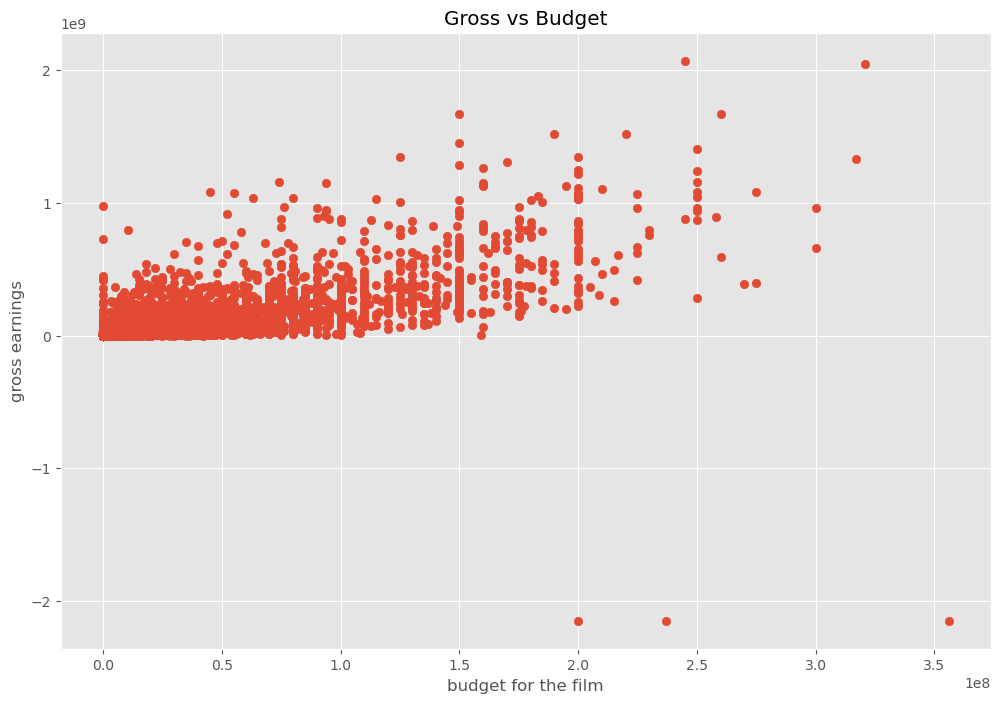

In [237]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Gross vs Budget')
plt.xlabel('budget for the film')
plt.ylabel('gross earnings')
plt.show()

In [233]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149.0,2018,United States
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,260000000,1670727580,Walt Disney Pictures,118.0,2019,United States
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,150000000,1670516444,Universal Pictures,124.0,2015,United States
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,220000000,1518815515,Marvel Studios,143.0,2012,United States


<Axes: xlabel='budget', ylabel='gross'>

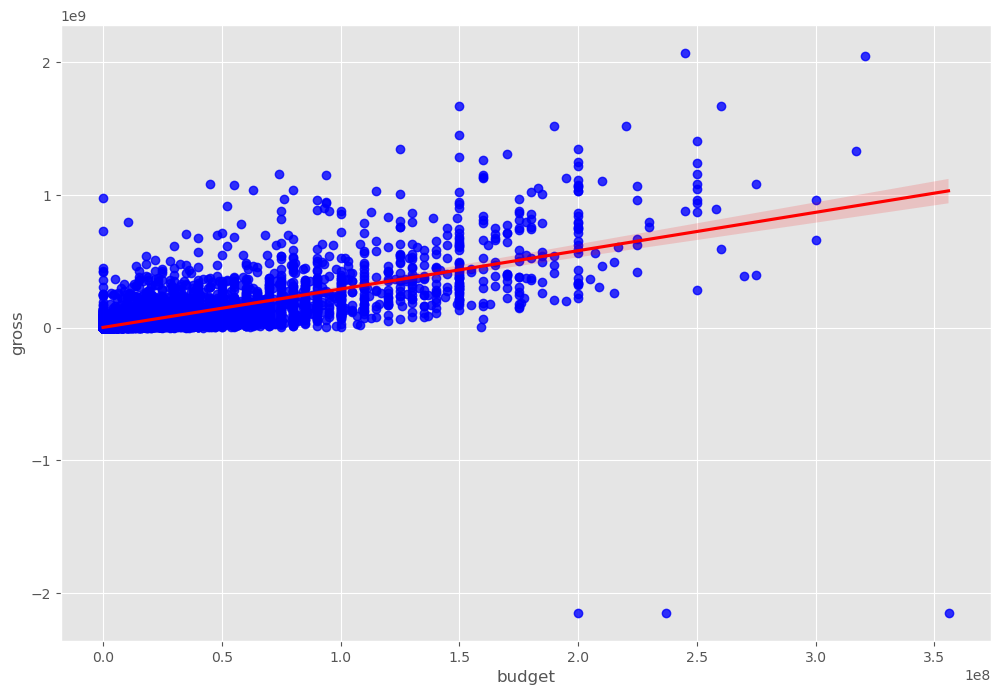

In [243]:
# Plot the Budget vs Gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})

In [259]:
#lets look at correlation
df.corr(method='pearson',numeric_only=True) # methods:pearson(default),kendall,spearman

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.409182,1.000000,0.486931,0.573930,0.309122
budget,0.055665,0.486931,1.000000,0.687124,0.269510
gross,0.169406,0.573930,0.687124,1.000000,0.204177
runtime,0.399451,0.309122,0.269510,0.204177,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

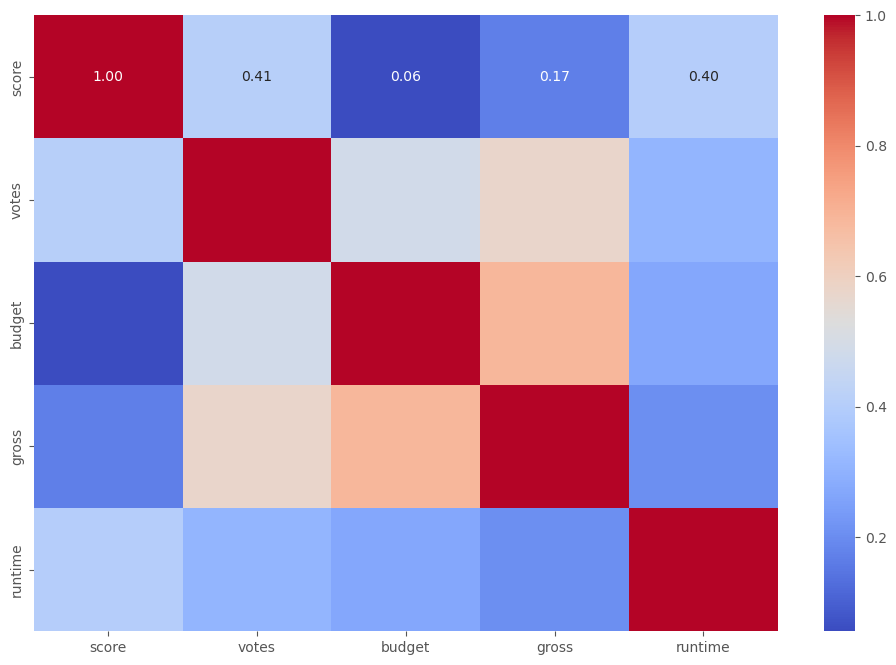

In [275]:
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show

In [307]:
# Talking about company

df_numerized=df
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,5144,5,0,698,7.8,876000,1125,2550,524,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,192,8.4,897000,162,743,2241,321000000,2048359754,1606,149.0,38,56
7480,6194,4,2,1488,6.9,222000,1455,1919,676,260000000,1670727580,2316,118.0,39,56
6653,2969,5,0,1704,7.0,593000,517,3568,437,150000000,1670516444,2281,124.0,35,56
6043,5502,5,0,2472,8.0,1300000,1517,2314,2241,220000000,1518815515,1606,143.0,32,56


In [309]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,country_released
6663,5144,5,0,698,7.8,876000,1125,2550,524,245000000,2069521700,1540,138.0,35,56
7244,536,5,0,192,8.4,897000,162,743,2241,321000000,2048359754,1606,149.0,38,56
7480,6194,4,2,1488,6.9,222000,1455,1919,676,260000000,1670727580,2316,118.0,39,56
6653,2969,5,0,1704,7.0,593000,517,3568,437,150000000,1670516444,2281,124.0,35,56
6043,5502,5,0,2472,8.0,1300000,1517,2314,2241,220000000,1518815515,1606,143.0,32,56


<function matplotlib.pyplot.show(close=None, block=None)>

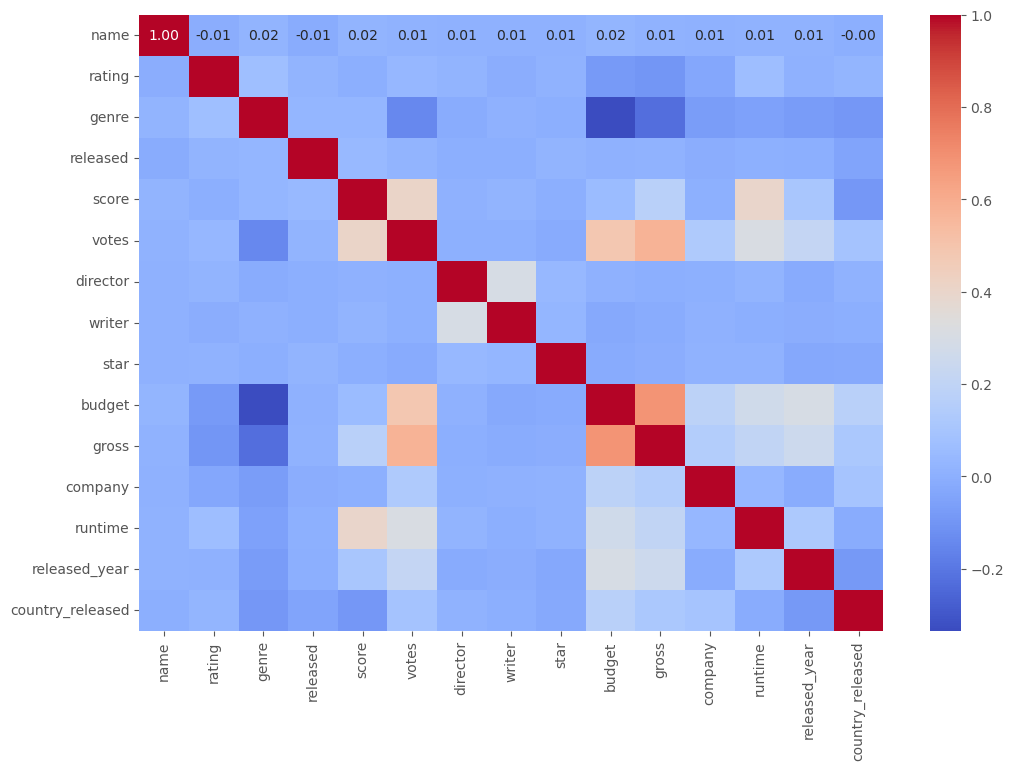

In [284]:
correlation_matrix=df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show

In [293]:
corr_mat=df_numerized.corr()
corr_pairs=corr_mat.unstack()
corr_pairs

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  released           -0.011311
                  score               0.017097
                  votes               0.013038
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  budget              0.020548
                  gross               0.013895
                  company             0.009211
                  runtime             0.010392
                  released_year       0.010225
                  country_released   -0.001968
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
                  released            0.016613
                  score              -0.001314
                  votes               0.033743
             

In [297]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre             budget             -0.334021
budget            genre              -0.334021
gross             genre              -0.229534
genre             gross              -0.229534
                  votes              -0.145296
votes             genre              -0.145296
gross             rating             -0.095355
rating            gross              -0.095355
score             country_released   -0.092763
country_released  score              -0.092763
genre             country_released   -0.091572
country_released  genre              -0.091572
                  released_year      -0.088402
released_year     country_released   -0.088402
budget            rating             -0.081939
rating            budget             -0.081939
released_year     genre              -0.078210
genre             released_year      -0.078210
                  company            -0.071067
company           genre              -0.071067
genre             runtime            -0.052711
runtime      

In [305]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross             votes               0.573930
votes             gross               0.573930
budget            gross               0.687124
gross             budget              0.687124
name              name                1.000000
writer            writer              1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
genre             genre               1.000000
rating            rating              1.000000
released_year     released_year       1.000000
country_released  country_released    1.000000
dtype: float64

In [ ]:
#gross and budget,gross and votes have high correlation
#company has low correltion